<a href="https://colab.research.google.com/github/Yash-Kamtekar/Deep_learning_assignment_1/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Gradient Descent from scratch**

Import libraries

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

Mounting drive

In [159]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


importing the dataset.

In [160]:
salary_dataset = pd.read_csv("/content/drive/MyDrive/258/Assignment_1/Salary.csv")
salary_dataset.head()

,YearsExperience,Salary,age,company_change,type
0,1.1,39343,21,1,junior
1,1.3,46205,31,0,middle
2,1.5,37731,29,1,middle
3,2.0,43525,30,1,middle
4,2.2,39891,27,1,middle


take only years of experince and salary

In [161]:
x = np.array(salary_dataset['YearsExperience'])
y = np.array(salary_dataset['Salary'])
l = len(x)

split the data set into train and test
and storing the len of train data set in a variable.

In [162]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=32)
lx = len(x_train)

In [163]:
m = 0.1
c = 0.01
alpha = 0.01
n = 4000
for i in range(n):
    slope = 0
    intercept = 0
    for j in range(lx):
        intercept = intercept + ((m *x_train[j] + c) - y_train[j])
        slope = slope + ((m *x_train[j] + c) - y_train[j]) * x_train[j]
    c = c-alpha * (intercept / lx)
    m = m-alpha * (slope / lx)

slope and y intercept.

In [164]:
print(f"slope is {m}")
print(f"intercept is {c}")

slope is 9661.770520278025
intercept is 25227.29486229368


In [165]:
y_pred = np.dot(m, x_test) + c
y_pred

array([ 35855.2424346 ,  64840.55399543,  54212.60642313,  63874.37694341,
        93825.86555627,  72569.97041166, 126675.88532521, 112183.2295448 ])

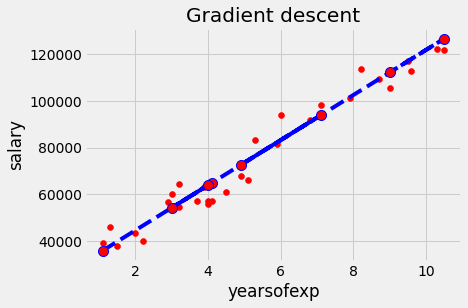

In [166]:
plt.plot(x_test, y_pred, marker='o', color='blue', markerfacecolor='red', markersize=10, linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel("yearsofexp")
plt.ylabel("salary")
plt.title("Gradient descent")
plt.show()

In [167]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.metrics import explained_variance_score

We can see that we got a very good accuracy of 95%

In [168]:
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

32920447.21035915
5737.634286912957
5573.287725813661
0.9610803330349375
0.9550256304021368


## **Stochastic Gradient Descent**

In [169]:
salary_dataset = pd.read_csv("/content/drive/MyDrive/258/Assignment_1/Salary.csv")
salary_dataset.head()

,YearsExperience,Salary,age,company_change,type
0,1.1,39343,21,1,junior
1,1.3,46205,31,0,middle
2,1.5,37731,29,1,middle
3,2.0,43525,30,1,middle
4,2.2,39891,27,1,middle


In [170]:
x = np.array(salary_dataset['YearsExperience'])
y = np.array(salary_dataset['Salary'])
l = len(x)

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=6)
lx = len(x_train)

In [172]:
m = 0.1
c = 0.5
alpha = 0.01
n = 4000
for i in range(n):
    slope = 0
    intercept = 0
    for j in range(lx):
        random_index = np.random.randint(lx)
        intercept = intercept + ((m * x_train[random_index:random_index + 1] + c) - y_train[random_index:random_index + 1])
        slope = slope + ((m * x_train[random_index:random_index + 1] + c) - y_train[random_index:random_index + 1]) * x_train[random_index:random_index + 1]
        c = c - alpha * (intercept / lx)
        m = m - alpha * (slope / lx)

Slope and y-intercept

In [173]:
print(f"slope is {m}")
print(f"intercept is {c}")

slope is [7651.11755368]
intercept is [22593.03894822]


In [174]:
y_pred = np.dot(m[0], x_test) + c[0]
y_pred

array([ 31009.26825726, 101399.54975109,  96043.76746351,  45546.39160925,
        63143.9619827 ,  68499.74427028,  47076.61511998,  44781.27985388])

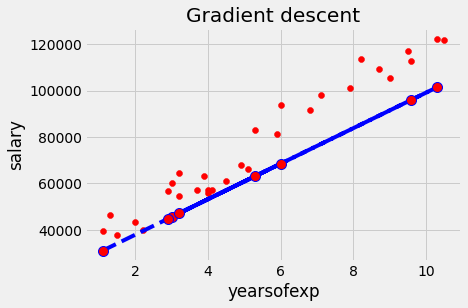

In [175]:
plt.plot(x_test, y_pred,marker='o', color='blue', markerfacecolor='red', markersize=10, linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel("yearsofexp")
plt.ylabel("salary")
plt.title("Gradient descent")
plt.show()

We can see that we get an accuracy of around 92%.

In [176]:
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

279820935.6970526
16727.84910552019
15641.677711505776
0.9551678934748029
0.6431919546227053


##**Mean-Batch Gradient Descent**

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=32)
lx = len(x_train)

Create a class to mini batch

1. Shuffke and create batch

2. fitting the model

3. visualise slope intercept

4. predict

In [178]:
class mini_batch_gradient_descent:
    
    def create_batch(self, x_train, y_train, batch_size):
        mini_batches = []
        data = np.stack((x_train, y_train), axis=1)
        np.random.shuffle(data)
        no_of_batches = x_train.shape[0] // batch_size
        for i in range(no_of_batches):
            mini_batch = data[i * batch_size:(i + 1) * batch_size]
            mini_batches.append((mini_batch[:,0], mini_batch[:,1]))
        if x_train.shape[0] % batch_size != 0:
            mini_batch = data[(i + 1) * batch_size:]
            mini_batches.append((mini_batch[:,0], mini_batch[:,1]))
        return mini_batches
    
    def fit(self, x_train, y_train, alpha, epochs, batch_size):
        self.m = np.random.randn(1, 1)
        self.c = np.random.randn(1, 1)
        l = len(x_train)
        for i in range(epochs):
            batches = self.create_batch(x_train, y_train, batch_size)
            for batch in batches:
                xb = batch[0]
                yb = batch[1]
                xb = xb.reshape(1, xb.shape[0])
                intecept = np.sum((np.dot(self.m, xb) + self.c) - yb)
                slope = np.sum(((np.dot(self.m, xb) + self.c) - yb) * xb)
                self.m = self.m - alpha * (slope / l)
                self.c = self.c - alpha * (intecept / l)
    
    def slope_intercept(self):
        print(f"slope is {self.m[0][0]}")
        print(f"intecept is {self.c[0][0]}")
    
    def predict(self,x_test):
        x_test = x_test.reshape(x_test.shape[0], 1)
        self.m = self.m.reshape(self.m.shape[1], self.m.shape[0])
        result = np.dot(x_test, self.m) +self.c
        return result

Initalise the batch size.

In [179]:
mgd = mini_batch_gradient_descent()
mgd.fit(x_train, y_train, 0.01, 4000, 8)
mgd.slope_intercept()

slope is 9668.233145551792
intecept is 25233.699502314525


In [180]:
y_pred = mgd.predict(x_test)

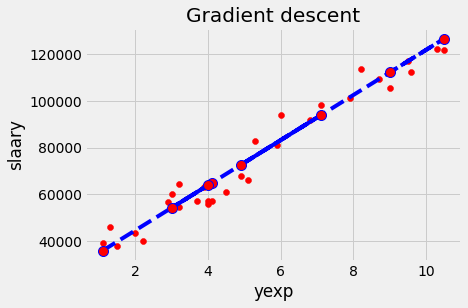

In [181]:
plt.plot(x_test,y_pred,marker='o', color='blue', markerfacecolor='red', markersize=10, linestyle='dashed')
plt.scatter(x, y, marker='o', color='red')
plt.xlabel("yexp")
plt.ylabel("slaary")
plt.title("Gradient descent")
plt.show()

We get an accuracy of 95%.

In [182]:
print(mean_squared_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(mean_absolute_error(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(r2_score(y_test,y_pred))

33173785.663676135
5759.668884899213
5592.095625610279
0.9609765113843967
0.9546795312996543
